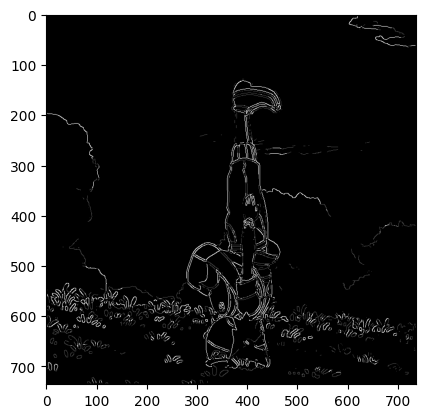

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(image, kernel_size=5, sigma=1.0):
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian = kernel @ kernel.T
    return cv2.filter2D(image, -1, gaussian)

def sobel_filters(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    gradient_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)

    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x)
    return magnitude, direction

def non_max_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)
    angle = np.rad2deg(direction) % 180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = magnitude[i + 1, j], magnitude[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]

    return suppressed

def threshold(image, low=50, high=100):
    strong = np.uint8(255)
    weak = np.uint8(75)

    strong_edges = image >= high
    weak_edges = (image >= low) & (image < high)

    result = np.zeros_like(image, dtype=np.uint8)
    result[strong_edges] = strong
    result[weak_edges] = weak
    return result


image = cv2.imread('ash1.jpg', cv2.IMREAD_GRAYSCALE)
blurred = gaussian_filter(image)
magnitude, direction = sobel_filters(blurred)
suppressed = non_max_suppression(magnitude, direction)
edges = threshold(suppressed)

plt.imshow(edges, cmap='gray')
plt.show()


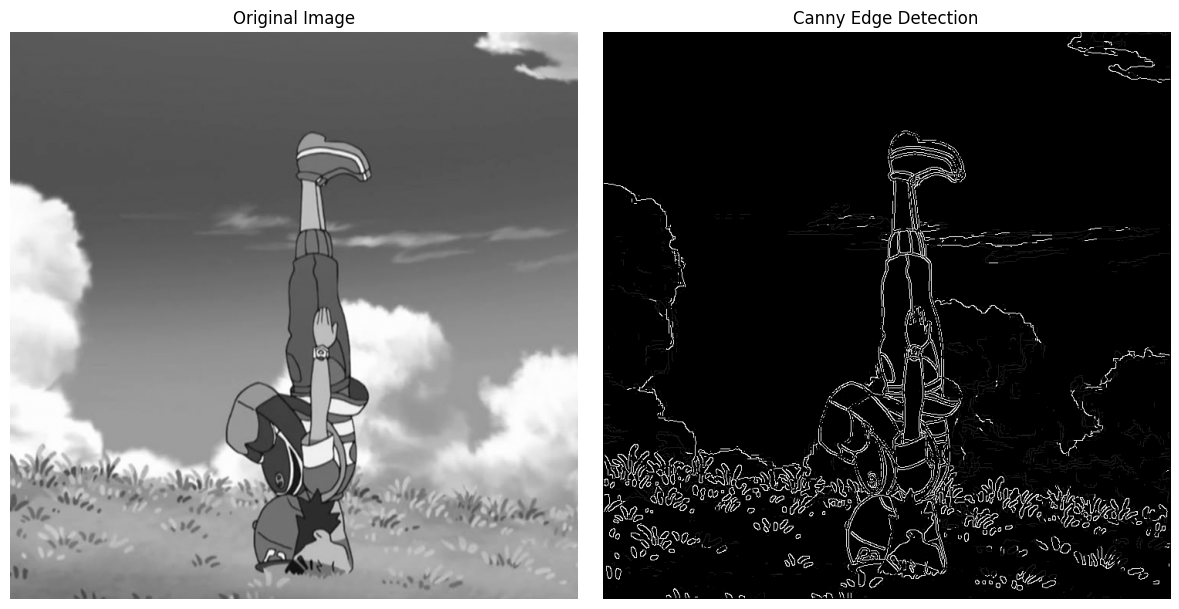

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(image, kernel_size=5, sigma=0.5):
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    kernel = np.exp(-0.5 * (ax / sigma) ** 2)
    kernel /= kernel.sum()
    gaussian = np.outer(kernel, kernel)
    return cv2.filter2D(image, -1, gaussian)

def sobel_filter_manual(image, kernel):
    image = image.astype(np.float32)
    height, width = image.shape
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2
    padded_img = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            region = padded_img[i:i + kernel_size, j:j + kernel_size]
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)
    return output

def sobel_filters(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    grad_x = sobel_filter_manual(image, sobel_x)
    grad_y = sobel_filter_manual(image, sobel_y)
    return np.sqrt(grad_x**2 + grad_y**2), np.arctan2(grad_y, grad_x)

def non_max_suppression(magnitude, direction):
    angle = (np.rad2deg(direction) % 180).astype(np.uint8)
    suppressed = np.zeros_like(magnitude, dtype=np.uint8)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = magnitude[i + 1, j], magnitude[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]
    return suppressed

def threshold(image, low=20, high=50):
    strong, weak = 255, 30
    result = np.zeros_like(image, dtype=np.uint8)
    result[image >= high], result[(image >= low) & (image < high)] = strong, weak
    return result

image = cv2.imread('ash1.jpg', cv2.IMREAD_GRAYSCALE)

blurred = gaussian_filter(image)
magnitude, direction = sobel_filters(blurred)
suppressed = non_max_suppression(magnitude, direction)
edges = threshold(suppressed)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


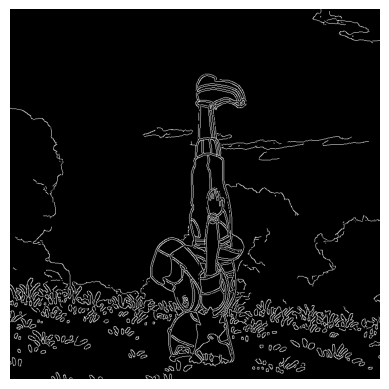

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('ash1.jpg', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
canny = cv2.Canny(blurred,20,50)

plt.axis("off")
plt.imshow(canny, cmap='gray')
plt.show()

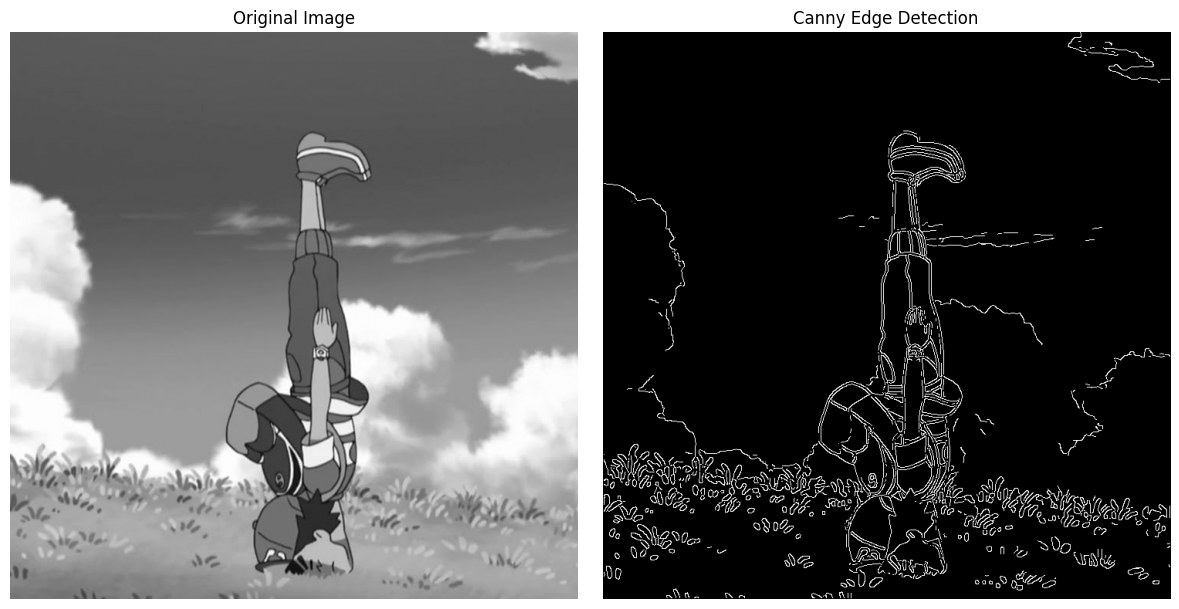

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(image, kernel_size=5, sigma=0.9):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    for x in range(kernel_size):
        for y in range(kernel_size):
            distance = (x - center)**2 + (y - center)**2
            kernel[x, y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-distance / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

def sobel_filters(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradient_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x)
    return magnitude, direction

def non_max_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)
    angle = np.rad2deg(direction) % 180
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = magnitude[i + 1, j], magnitude[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

def threshold(image, low=50, high=150):
    strong = np.uint8(255)
    weak = np.uint8(30)
    strong_edges = image >= high
    weak_edges = (image >= low) & (image < high)
    result = np.zeros_like(image, dtype=np.uint8)
    result[strong_edges] = strong
    result[weak_edges] = weak
    return result

def hysteresis(image, weak, strong=255):
    rows, cols = image.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if image[i, j] == weak:
                if ((image[i + 1, j - 1] == strong) or (image[i + 1, j] == strong) or
                        (image[i + 1, j + 1] == strong) or (image[i, j - 1] == strong) or
                        (image[i, j + 1] == strong) or
                        (image[i - 1, j - 1] == strong) or (image[i - 1, j] == strong) or
                        (image[i - 1, j + 1] == strong)):
                    image[i, j] = strong
                else:
                    image[i, j] = 0
    return image

def canny_edge_detection(image, low_threshold=50, high_threshold=150):
    kernel = gaussian_filter(image)
    blurred = cv2.filter2D(image, -1, kernel)
    magnitude, direction = sobel_filters(blurred)
    suppressed = non_max_suppression(magnitude, direction)
    thresholded = threshold(suppressed, low=low_threshold, high=high_threshold)
    final_edges = hysteresis(thresholded, weak=30)
    return final_edges

image = cv2.imread('ash1.jpg', cv2.IMREAD_GRAYSCALE)
edges = canny_edge_detection(image, low_threshold=30, high_threshold=50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.axis('off')
plt.show()

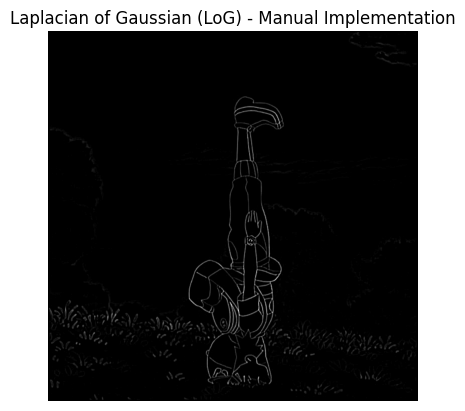

In [ ]:
def gaussian_filter(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    constant = 1 / (2 * np.pi * sigma**2)
    for x in range(kernel_size):
        for y in range(kernel_size):
            distance = (x - center)**2 + (y - center)**2
            kernel[x, y] = constant * np.exp(-distance / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

def laplacian_filter():
    return np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]], dtype=np.float32)

def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output = np.zeros_like(image, dtype=np.float32)
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                  (kernel_width // 2, kernel_width // 2)), mode='constant', constant_values=0)
    for i in range(image_height):
        for j in range(image_width):
            # Multiply the kernel with the corresponding part of the image
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)
    return output

def laplacian_of_gaussian(image, kernel_size=3, sigma=1.0):
    gaussian_kernel = gaussian_filter(kernel_size, sigma)
    blurred_image = convolve(image, gaussian_kernel)
    laplacian_kernel = laplacian_filter()
    log_image = convolve(blurred_image, laplacian_kernel)

    log_image = np.clip(log_image, 0, 255)
    log_image = log_image.astype(np.uint8)
    return log_image


log_edges = laplacian_of_gaussian(image, kernel_size=5, sigma=1.0)

plt.imshow(log_edges, cmap='gray')
plt.title('Laplacian of Gaussian (LoG) - Manual Implementation')
plt.axis('off')
plt.show()


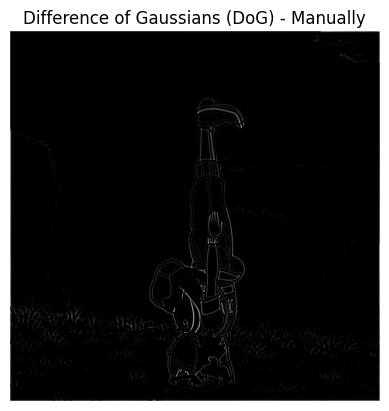

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to create a Gaussian kernel manually
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - (size // 2))**2 + (y - (size // 2))**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalize so that sum(kernel) = 1

# Function to manually convolve the image with a kernel
def convolution2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Pad the image to handle borders (valid padding)
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                  (kernel_width // 2, kernel_width // 2)),
                          mode='constant', constant_values=0)

    # Initialize the output image
    output = np.zeros_like(image, dtype=np.float32)

    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

# Function to compute the Difference of Gaussians (DoG)
def difference_of_gaussians(image, sigma1=1.0, sigma2=2.0, kernel_size=5):
    # Step 1: Create Gaussian kernels
    kernel1 = gaussian_kernel(kernel_size, sigma1)
    kernel2 = gaussian_kernel(kernel_size, sigma2)

    # Step 2: Convolve the image with both Gaussian kernels
    blurred1 = convolution2d(image, kernel1)
    blurred2 = convolution2d(image, kernel2)

    # Step 3: Subtract the two blurred images (DoG)
    dog_image = blurred1 - blurred2

    dog_image = np.clip(dog_image, 0, 255)  # Clip to the valid range
    dog_image = np.uint8(dog_image)  # Convert to uint8 for proper display

    return dog_image



dog_edges = difference_of_gaussians(image, sigma1=1.0, sigma2=2.0, kernel_size=5)

# Display the result
plt.imshow(dog_edges, cmap='gray')
plt.title('Difference of Gaussians (DoG) - Manually')
plt.axis('off')  # Hide axis
plt.show()


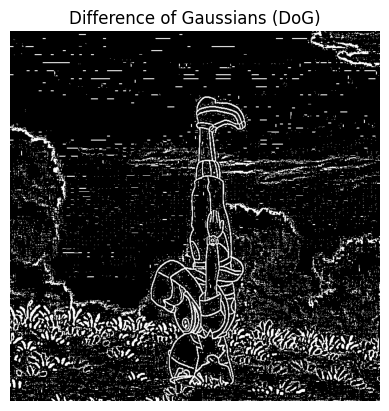

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def difference_of_gaussians(image, sigma1=1.0, sigma2=2.0, kernel_size=5):
    # Step 1: Apply Gaussian blur with different sigmas
    blurred1 = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma1)
    blurred2 = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma2)

    # Step 2: Subtract the two Gaussian-blurred images
    dog_image = blurred1 - blurred2


    return dog_image


# Check if the image was loaded successfully
dog_edges = difference_of_gaussians(image, sigma1=1.0, sigma2=2.0, kernel_size=5)

# Display the result
plt.imshow(dog_edges, cmap='gray')
plt.title('Difference of Gaussians (DoG)')
plt.axis('off')  # Hide axis
plt.show()

